In [60]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math as math
import pybinding as pb
from pybinding.repository import graphene
pb.pltutils.use_style()
from IPython.display import display, HTML

## System_ImportantConstant

In [61]:
a = 3*graphene.a_cc # lattice length.
a_cc = graphene.a_cc # carbon-carbon bond length
t = graphene.t # hopping energy of graphene.
leng = 18*graphene.a_cc #lengh of supercell that I wanna make
m = 0.001 
plt.rcParams.update({'font.size': 15})


#Topological -> 위상 기하적
#넓은것과 좁은것이 또 합쳐저서 하나의 unit cel이 됨.
#상태에 따라서 에너지나 property가 많이 달라짐.
# LAPACK -> exact diag . must in small system.


# Armchair Graphene

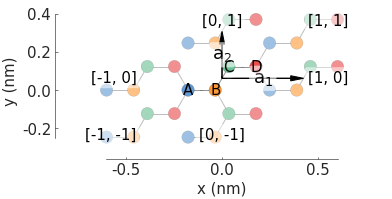

In [62]:
import math as math

def arm_chair_graphene() :
    
    lat = pb.Lattice(a1=[a,0], a2 = [0,math.sqrt(3)*a_cc]) #lattice vector
    
    lat.add_sublattices(
        ('A',[-5/4*a_cc,0/4*a_cc]),
        ('B',[-1/4*a_cc,0/4*a_cc]),
        ('C',[1/4*a_cc,2*math.sqrt(3)/4*a_cc]),
        ('D',[5/4*a_cc,2*math.sqrt(3)/4*a_cc])
        )
                        
    lat.add_hoppings(
        ([0,0], 'A', 'B', t),
        ([0,0], 'B', 'C', t),
        ([0,0], 'C', 'D', t),
        ([-1,0],'A','D',t),
        ([0,-1],'B','C',t), 
        ([1,1],'D','A',t) 
    )
    
    return lat


arm_chair = arm_chair_graphene()
arm_chair.plot()
plt.show()

## Armchair Graphene_Strtucture A

How many supercell you want to make?
2


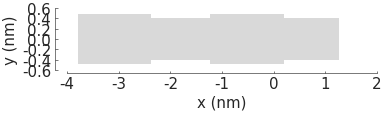

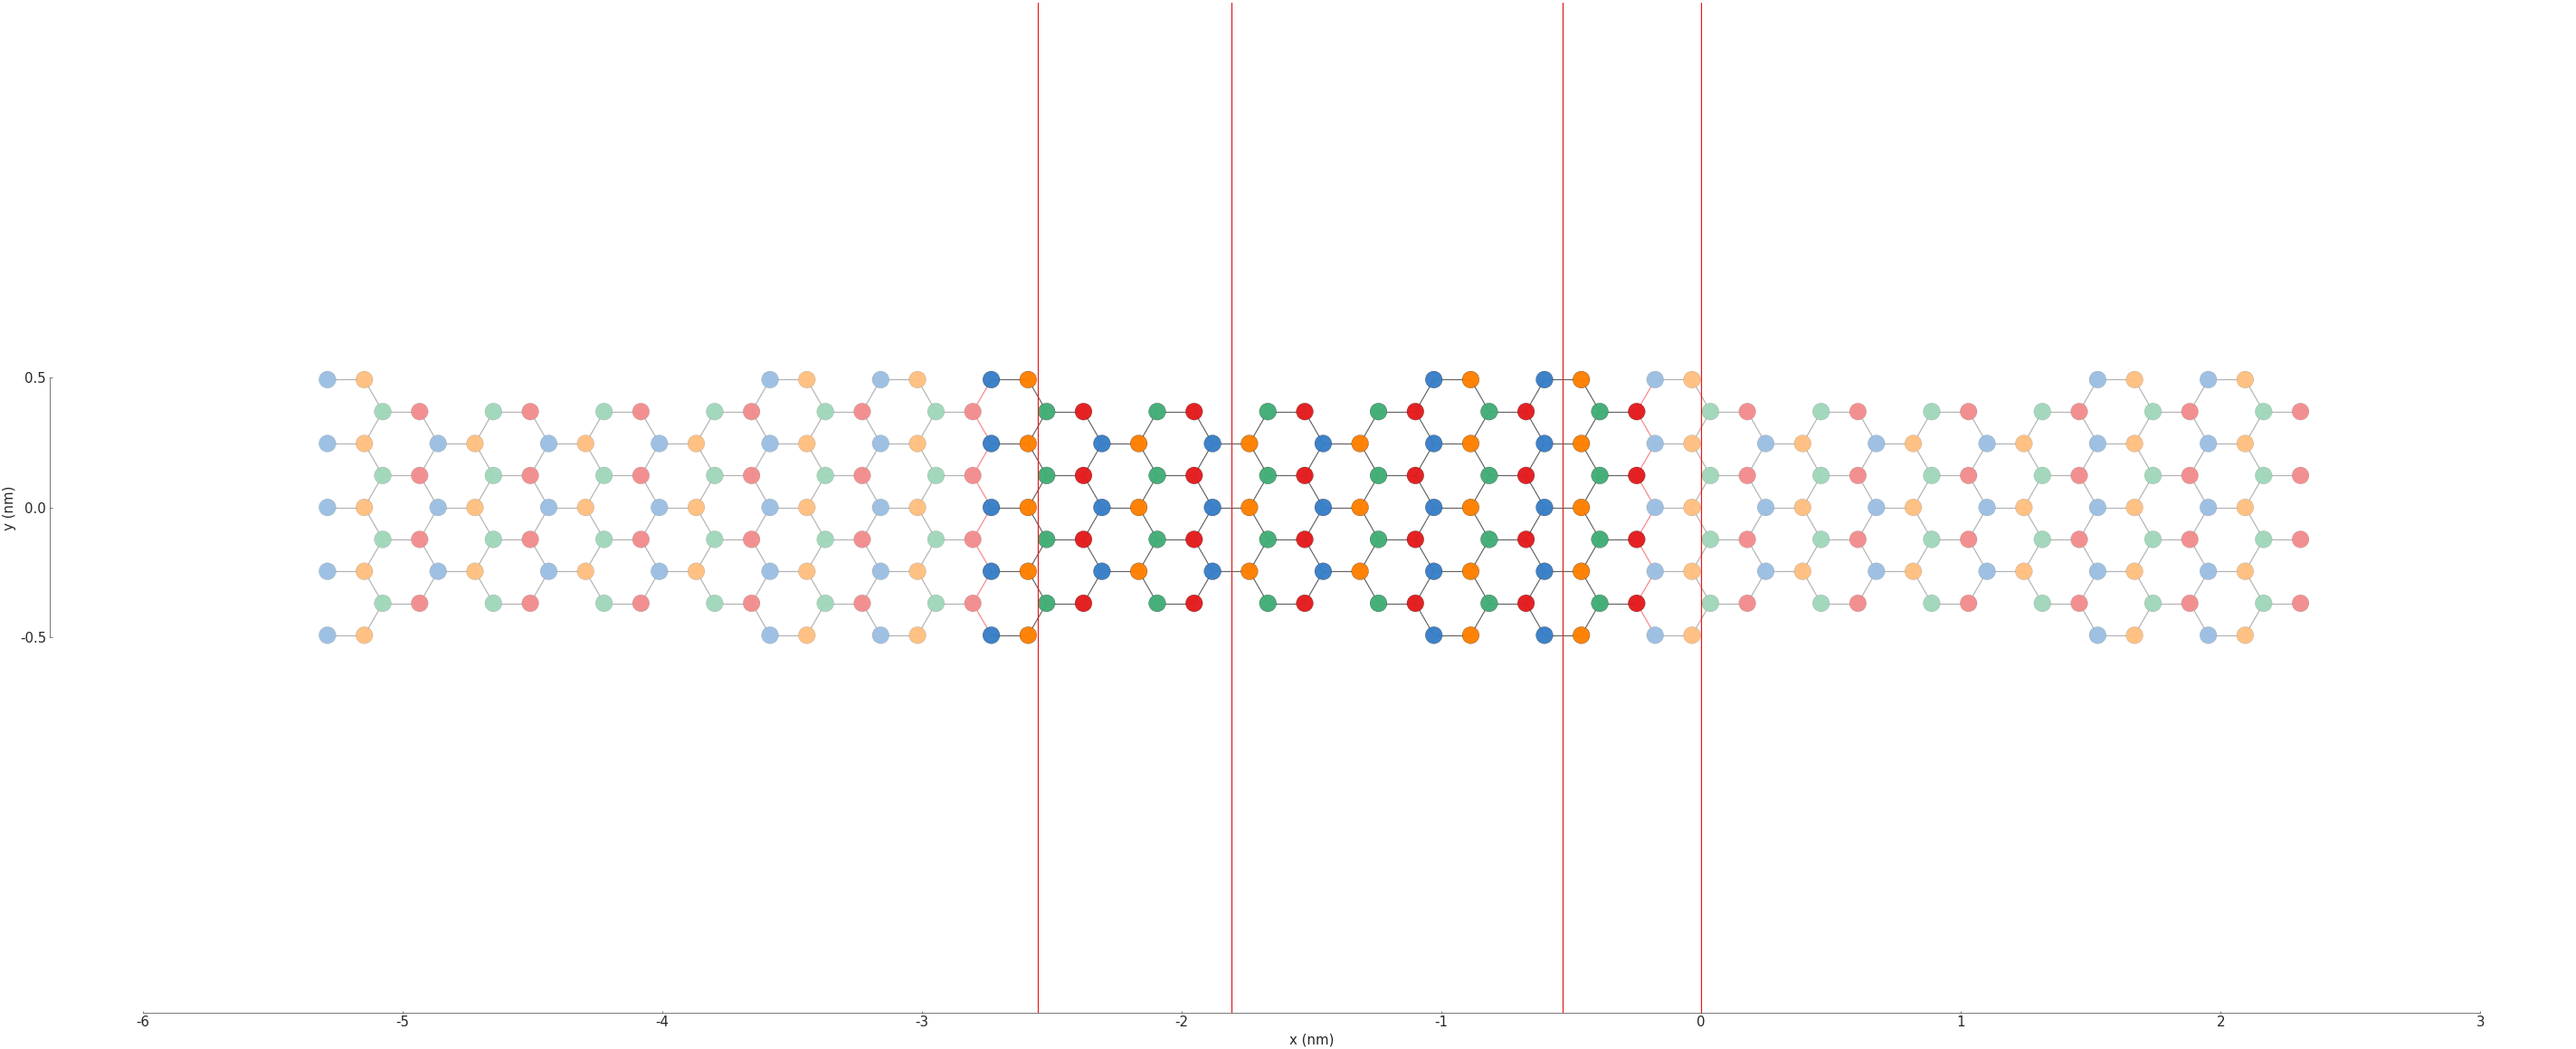

In [4]:
def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=8/2*math.sqrt(3)*a_cc+m*50) 
    rect_exc = pb.rectangle(x=3*a, y=1/2*math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1),0])
    tr_rect_down = rect_exc.with_offset([2*a+leng*(T-1), -math.sqrt(3)*2*a_cc]) #3/2*a_cc
    tr_rect_up = rect_exc.with_offset([2*a+leng*(T-1), math.sqrt(3)*2*a_cc-m]) #3/2*a_cc
    shape_1 = tr_rect - tr_rect_down -tr_rect_up

    return shape_1

supercell_A = shape(0)

print('How many supercell you want to make?')
inp = input() 


for i in range (0,int(inp)) :
    supercell_A += shape(i)
    
    
supercell_A.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
plt.axvline(-5/2*(a_cc+a_cc/2),0)
plt.axvline(-12*(a_cc+a_cc/2),0)
plt.axvline(-17/2*(a_cc+a_cc/2),0)
plt.axvline(0,0)
arm_gra_A = pb.Model(arm_chair, supercell_A, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_A.plot()
#arm_gra.shape.plot()

몇층을 더 쌓고싶으신가요? Default = 5 ... 2
1
몇층을 더 깎고싶으신가요? Default = 1 ...2 
2
How many supercell you want to make?... 2 
2


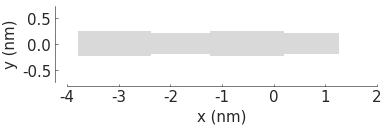

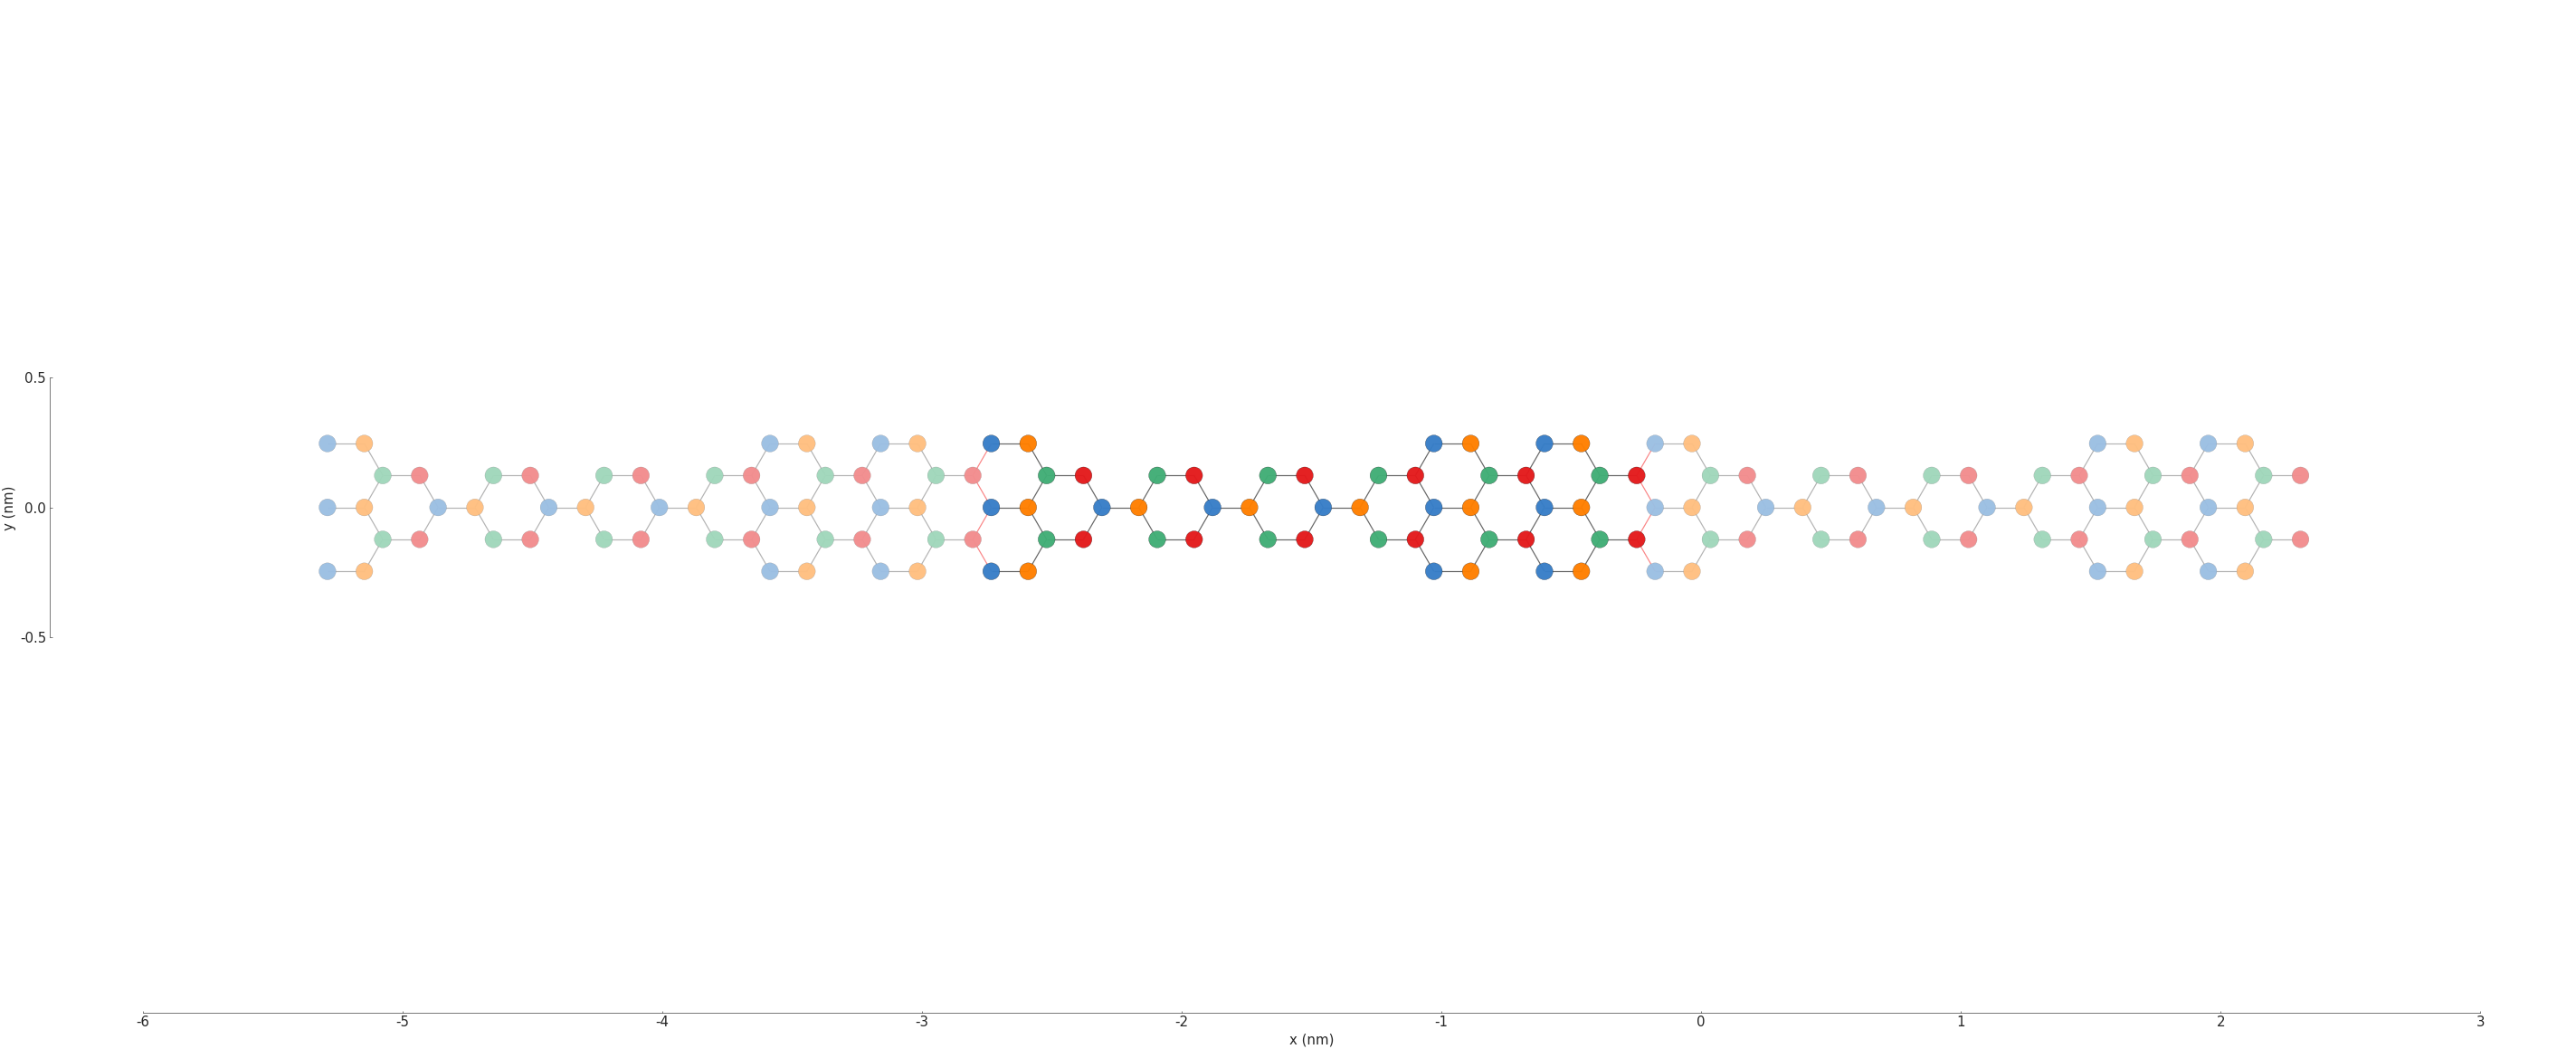

In [63]:
print("몇층을 더 쌓고싶으신가요? Default = 5 ... 2" )
inp2 = input()
print("몇층을 더 깎고싶으신가요? Default = 1 ...2 ")
inp4 = input()

def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=2*int(inp2)*math.sqrt(3)*a_cc+m*50) 
    rect_exc = pb.rectangle(x=3*a, y=(int(inp4)*2-2)*math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1),0])
    tr_rect_down = rect_exc.with_offset([2*a+leng*(T-1), -math.sqrt(3)*2*a_cc+m-(int(inp2)*2-2)/2*math.sqrt(3)*a_cc]) #3/2*a_cc
    tr_rect_up = rect_exc.with_offset([2*a+leng*(T-1), math.sqrt(3)*2*a_cc-m+(int(inp2)*2-2)/2*math.sqrt(3)*a_cc]) #3/2*a_cc
    shape_1 = tr_rect -tr_rect_up - tr_rect_down 

    return shape_1

supercell_A = shape(0)

print('How many supercell you want to make?... 2 ')
inp = input() 


for i in range (0,int(inp)) :
    supercell_A += shape(i)
    
    
supercell_A.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
arm_gra_A = pb.Model(arm_chair.with_min_neighbors(2), supercell_A, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_A.plot()
#arm_gra.shape.plot()

몇층을 더 쌓고싶으신가요? Default = 5 ... 2
1
몇층을 더 깎고싶으신가요? Default = 1 ...2 
2
How many supercell you want to make?... 2 
2


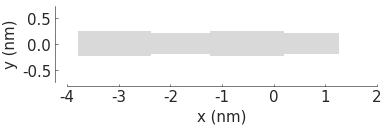

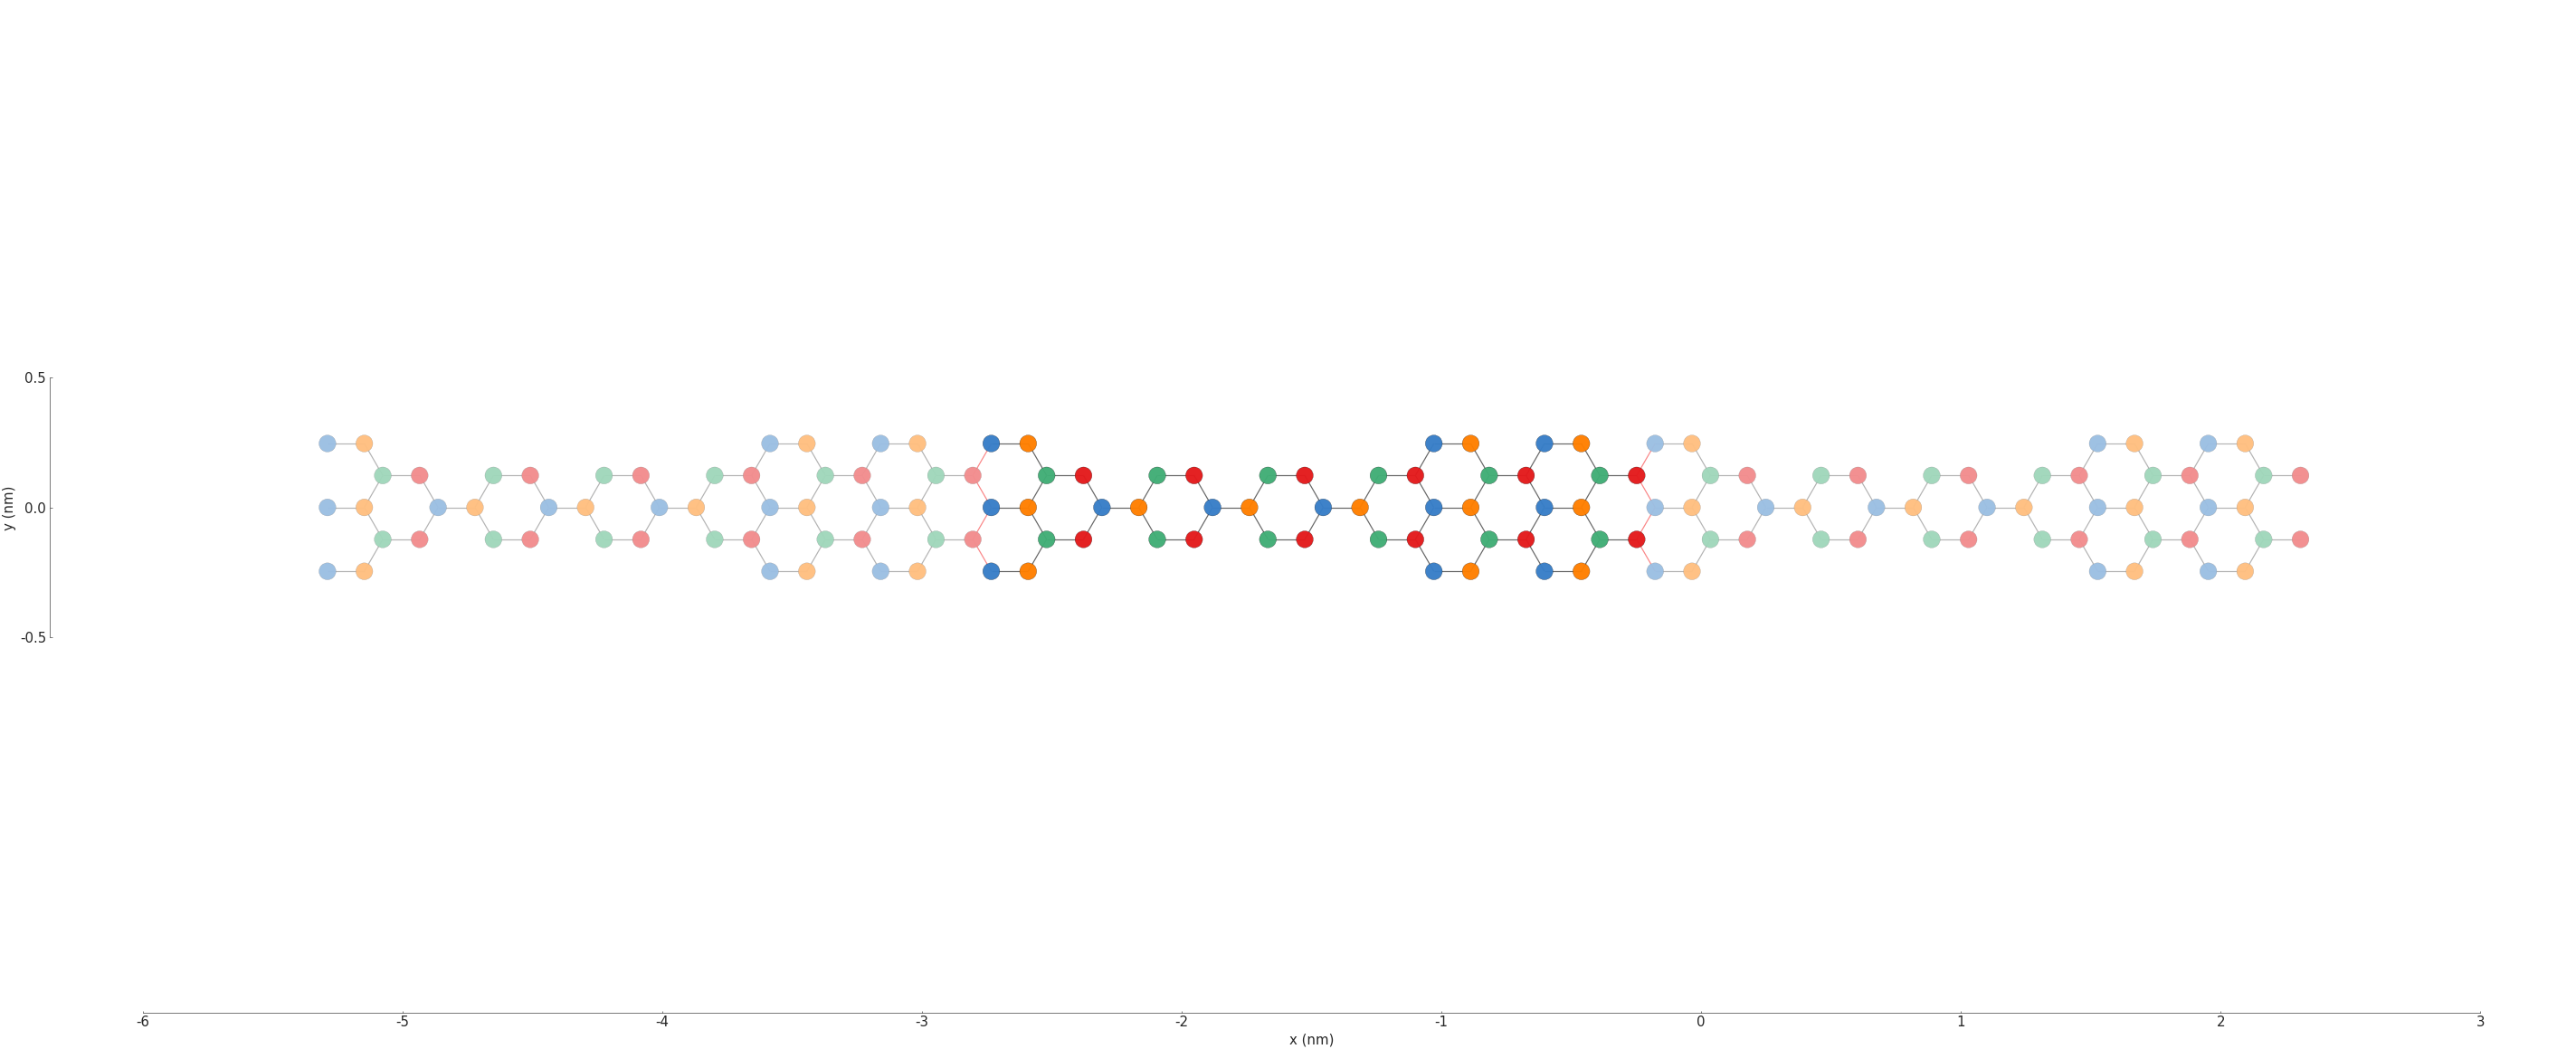

In [58]:
print("몇층을 더 쌓고싶으신가요? Default = 5 ... 2" )
inp2 = input()
print("몇층을 더 깎고싶으신가요? Default = 1 ...2 ")
inp4 = input()

def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=2*int(inp2)*math.sqrt(3)*a_cc+m*50) 
    rect_exc = pb.rectangle(x=3*a, y=(int(inp4)*2-2)*math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1),0])
    tr_rect_down = rect_exc.with_offset([2*a+leng*(T-1), -math.sqrt(3)*2*a_cc+m-(int(inp2)*2-2)/2*math.sqrt(3)*a_cc]) #3/2*a_cc
    tr_rect_up = rect_exc.with_offset([2*a+leng*(T-1), math.sqrt(3)*2*a_cc-m+(int(inp2)*2-2)/2*math.sqrt(3)*a_cc]) #3/2*a_cc
    shape_1 = tr_rect -tr_rect_up - tr_rect_down 

    return shape_1

supercell_A = shape(0)

print('How many supercell you want to make?... 2 ')
inp = input() 


for i in range (0,int(inp)) :
    supercell_A += shape(i)
    
    
supercell_A.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
arm_gra_A = pb.Model(arm_chair.with_min_neighbors(2), supercell_A, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_A.plot()
#arm_gra.shape.plot()

In [64]:
energy(arm_gra_A)

TypeError: 'float' object is not callable

## Armchair Graphene_Structure B

3
How many supercell_B you want to make? +1을 해주세요
2


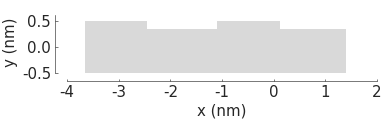

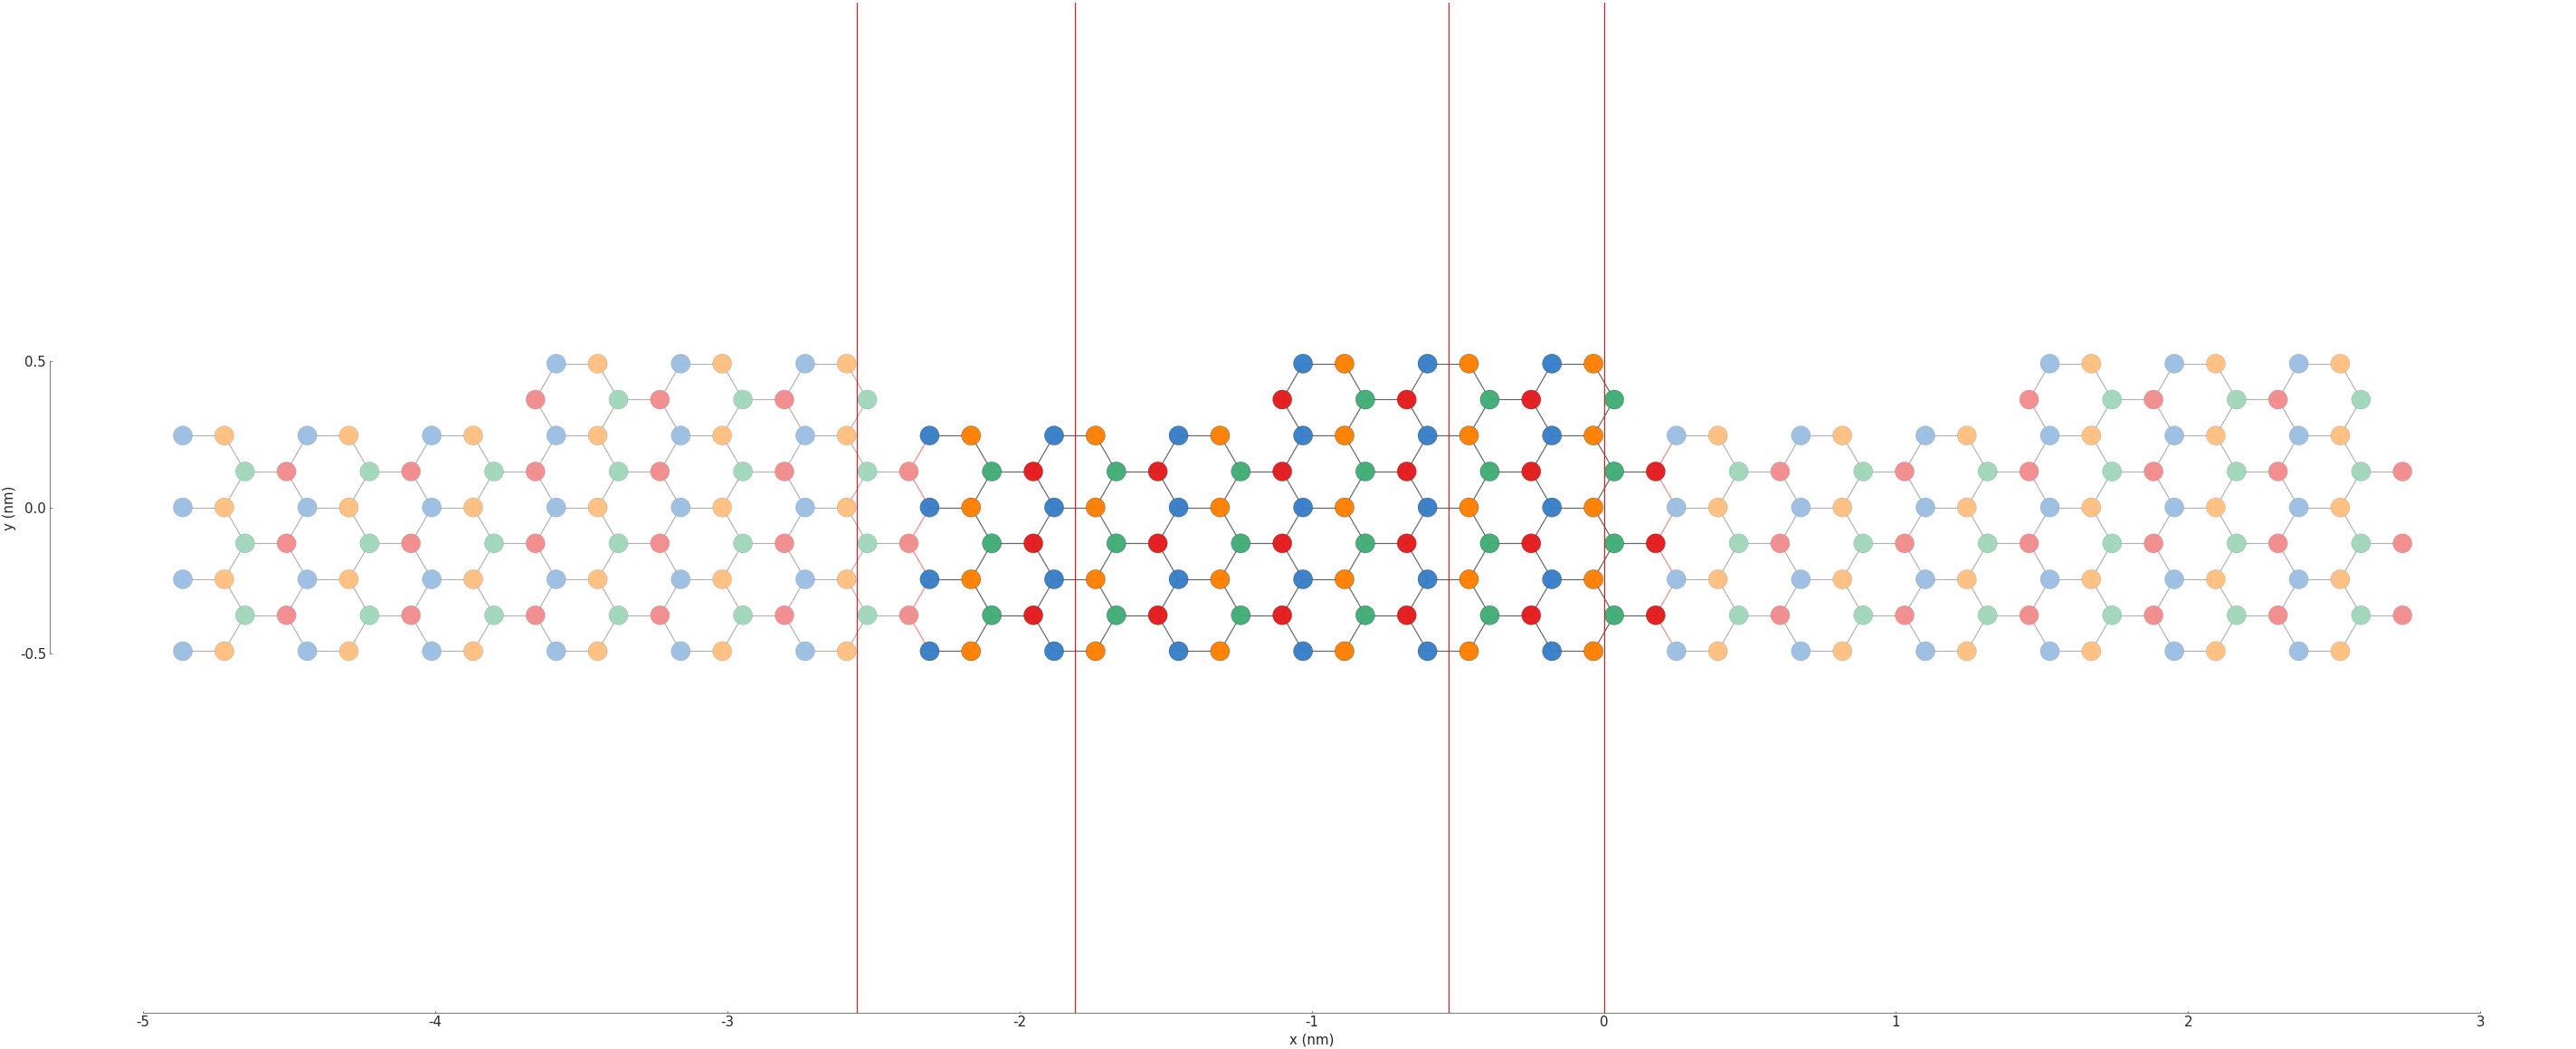

In [17]:
inp3 = input()

def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=8/2*math.sqrt(3)*a_cc+m*50) 
    rect_exc_B = pb.rectangle(x=4*a, y=math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1)+1*a_cc,0])
    tr_rect_up_B = rect_exc_B.with_offset([2*a+leng*(T-1)+a_cc, math.sqrt(3)*2*a_cc-m]) #3/2*a_cc
    shape_1 = tr_rect - tr_rect_up_B

    return shape_1

supercell_B = shape(0)

print('How many supercell_B you want to make? +1을 해주세요')
inp = input() 


for i in range (0,int(inp)) :
    supercell_B += shape(i)
    
    
supercell_B.plot()
#arm_gra = pb.Model(lattice, shape())#,pb.translational_symmetry(a1=18*a_cc,a2=False))
#arm_gra.plot()
#arm_gra.shape.plot()

plt.figure(figsize=(50, 20.6))
plt.axvline(-5/2*(a_cc+a_cc/2),0)
plt.axvline(-12*(a_cc+a_cc/2),0)
plt.axvline(-17/2*(a_cc+a_cc/2),0)
plt.axvline(0,0)
arm_gra_B = pb.Model(arm_chair, supercell_B, pb.translational_symmetry(a1=(int(inp)-1)*18*(a_cc) ,a2=False))
arm_gra_B.plot()
#arm_gra.shape.plot()

## Armchair Graphene_Energy

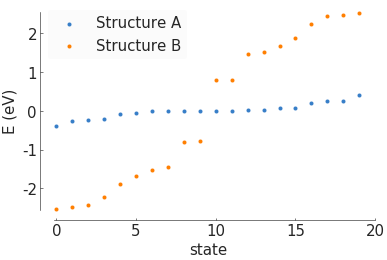

In [19]:
plt.plot(figsize=(25, 25))
solverA = pb.solver.arpack(arm_gra_A, k=20)  # for the 20 lowest energy eigenvalues
solverB = pb.solver.arpack(arm_gra_B, k=20)  # for the 20 lowest energy eigenvalues
eigenvaluesA = solverA.calc_eigenvalues()
eigenvaluesA.plot(label="Structure A")
eigenvaluesB = solverB.calc_eigenvalues()
eigenvaluesB.plot(label="Structure B", c='C4')

pb.pltutils.legend()

In [20]:
"""
eigenvalues = solver.calc_eigenvalues(map_probability_at=[0.1, 0.6])  # position in [nm]
eigenvalues.plot_heatmap(show_indices=True)
pb.pltutils.colorbar()"""

'\neigenvalues = solver.calc_eigenvalues(map_probability_at=[0.1, 0.6])  # position in [nm]\neigenvalues.plot_heatmap(show_indices=True)\npb.pltutils.colorbar()'

## Armchair Graphene_DOS

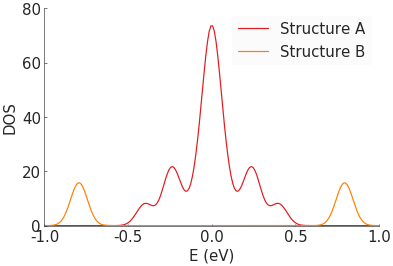

In [21]:
plt.plot(figsize=(25, 25))

dosA = solverA.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dosA.plot(label="Structure A")

dosB = solverB.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dosB.plot(label="Structure B", c='C4')


pb.pltutils.legend()

## Armchair Graphene_LDOS_KPM

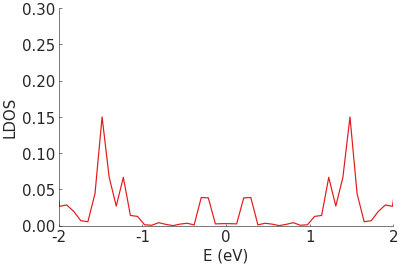

In [33]:
kpm = pb.kpm(arm_gra_A, kernel=pb.jackson_kernel())

# Construct a unit vector which is equal to 1 at the position
# where we want to calculate the local density of states
idx = arm_gra_A.system.find_nearest(position=[3*a_cc, 0], sublattice="A")
alpha = np.zeros(arm_gra_A.hamiltonian.shape[0])
alpha[idx] = 1

# The broadening and the kernel determine the needed number of moments
a, b = kpm.scaling_factors
broadening = 0.05  # (eV)
num_moments = kpm.kernel.required_num_moments(broadening / a)

# Main calculation
moments = kpm.moments(num_moments, alpha)  # optionally also takes beta and an operator

# Reconstruct the LDOS function
energy = np.linspace(-8.42, 8.42, 200)
scaled_energy = (energy - b) / a
ns = np.arange(num_moments)
k = 2 / (a * np.pi * np.sqrt(1 - scaled_energy**2))
chebyshev = np.cos(ns * np.arccos(scaled_energy[:, np.newaxis]))
ldos = k * np.sum(moments.real * chebyshev, axis=1)

plt.plot(energy, ldos)
plt.xlabel("E (eV)")
plt.ylabel("LDOS")
plt.xlim(-2,2)
pb.pltutils.despine()

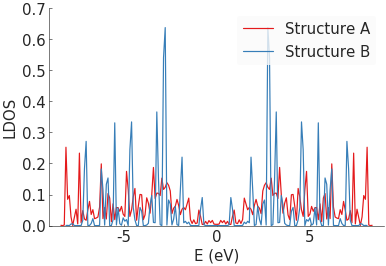

In [26]:
from pybinding.repository import graphene

kpmA = pb.kpm(arm_gra_A)
kpmB = pb.kpm(arm_gra_B)
ldosA = kpmA.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])
ldosB = kpmB.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])

plt.plot(figsize=(30, 30))
ldosA.plot(label="Structure A")
ldosB.plot(label="Structure B")





pb.pltutils.legend()

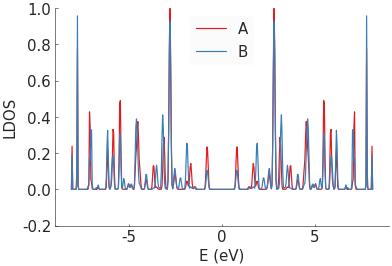

In [27]:
kpm = pb.kpm(arm_gra_B)

for sub_name in ["A", "B"]:
    ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 500), broadening=0.05,
                         position=[0, 0], sublattice=sub_name)
    ldos.plot(label=sub_name)
pb.pltutils.legend()

## Armchair Graphene_DOS_KPM

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:03 / ETA: 0:00:00
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:01 / ETA: 0:00:00


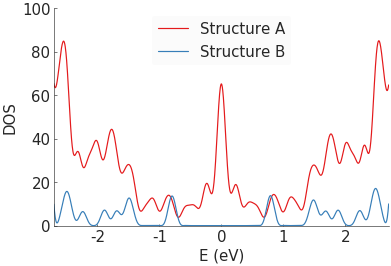

In [28]:
kpmA = pb.kpm(arm_gra_A)
kpmB = pb.kpm(arm_gra_B)

dosA = kpmA.calc_dos(energy=np.linspace(-2.7, 2.7, 1500), broadening=0.06, num_random=16**2)
dosB = kpmB.calc_dos(energy=np.linspace(-2.7, 2.7, 1500), broadening=0.06, num_random=16**2)


dosA.plot(label="Structure A")
dosB.plot(label="Structure B")

pb.pltutils.legend()

## Armchair Graphene_Spatial LDOS_KPM

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


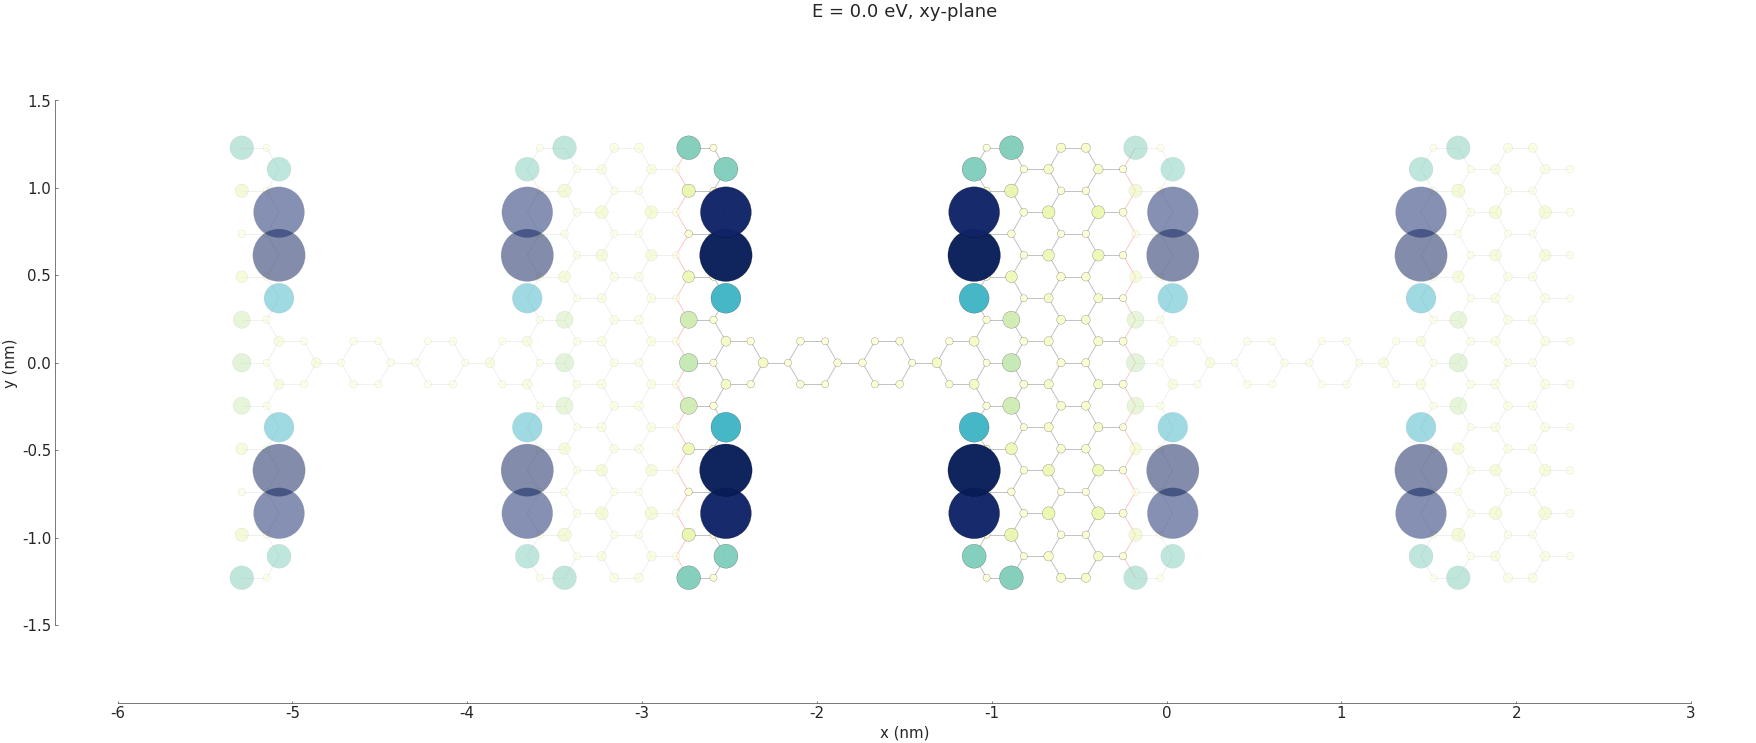

In [53]:
kpm = pb.kpm(arm_gra_A)
spatial_ldos = kpm.calc_spatial_ldos(energy=np.linspace(-3, 3, 100), broadening=0.2,  # eV
                                     shape = supercell_A)  # only within the shape
plt.figure(figsize=(67, 60))
gridspec = plt.GridSpec(2, 2, height_ratios=[1, 0.3], hspace=0)

energies = [0.0, 2, 0.0, 2]  # eV
planes = ["xy"]

for g, energy, axes in zip(gridspec, energies, planes):
    plt.subplot(g, title="E = {} eV, {}-plane".format(energy, axes))
    smap = spatial_ldos.structure_map(energy)
    smap.plot(site_radius=(0.02, 0.15), axes=axes)


Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


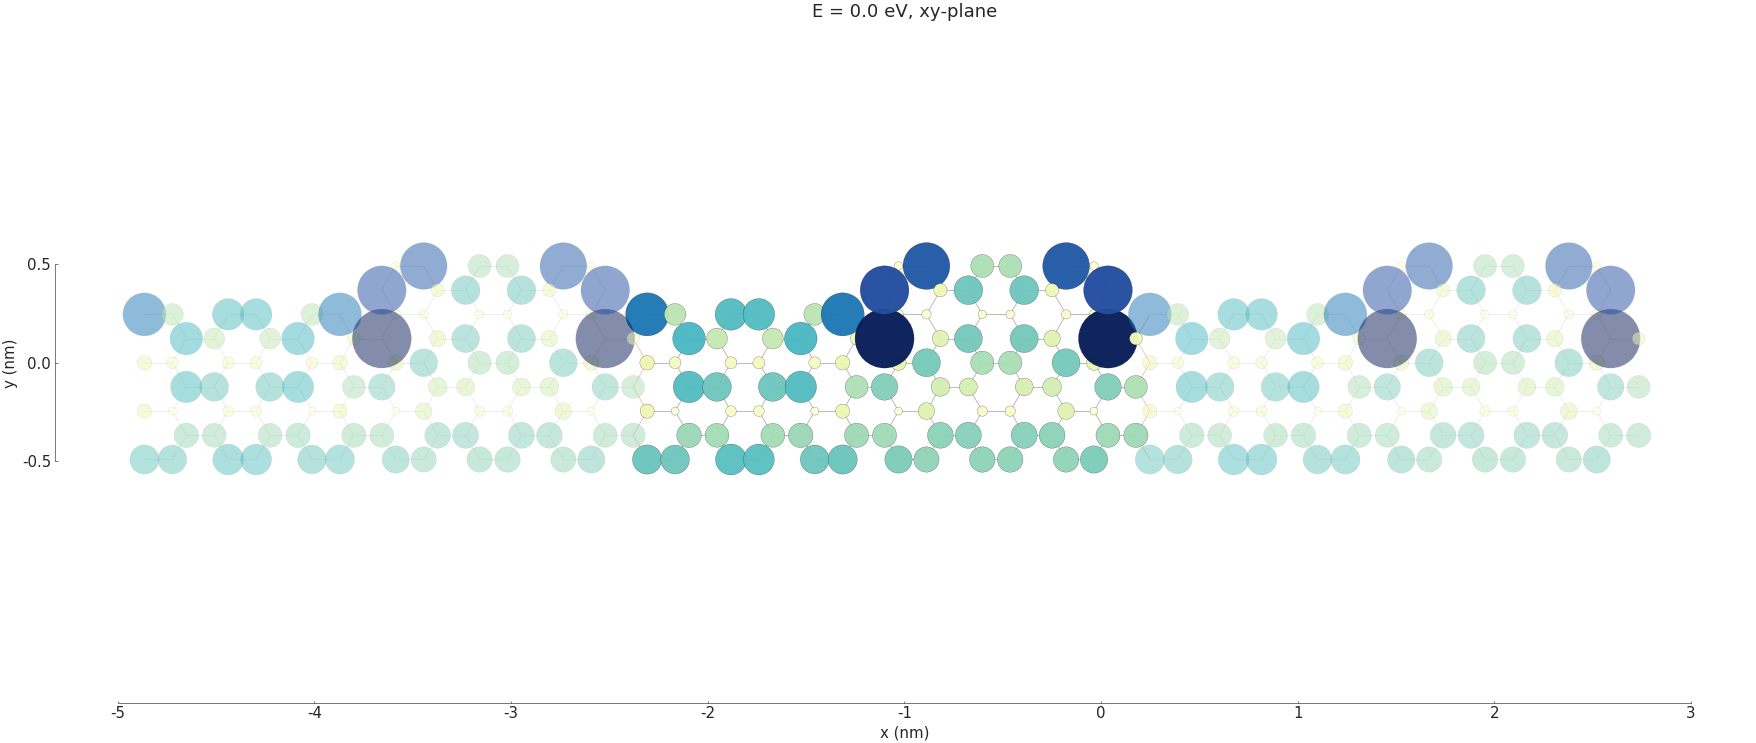

In [54]:
kpm = pb.kpm(arm_gra_B)
spatial_ldos = kpm.calc_spatial_ldos(energy=np.linspace(-3, 3, 100), broadening=0.2,  # eV
                                     shape = supercell_B)  # only within the shape
plt.figure(figsize=(67, 60))
gridspec = plt.GridSpec(2, 2, height_ratios=[1, 0.3], hspace=0)

energies = [0.0, 2, 0.0, 2]  # eV
planes = ["xy"]

for g, energy, axes in zip(gridspec, energies, planes):
    plt.subplot(g, title="E = {} eV, {}-plane".format(energy, axes))
    smap = spatial_ldos.structure_map(energy)
    smap.plot(site_radius=(0.02, 0.15), axes=axes)


## Armchair Graphene_Bandstructure

In [40]:
def mass_termy(V1,w1,w2,w3):
#This function makes potential difference along y axes. And it changes suddenly
    @pb.onsite_energy_modifier

    def potential(energy, sub_id,x,y):
        energy[y>=0] += V1
        energy[y<0] -= V1
        return energy
    
    return potential


def mass_termy_kink(V1,w1,w2,w3):
#This function makes potential difference along y axes. And it changes gradually
    @pb.onsite_energy_modifier
    def potential(energy, sub_id,x,y):
        yrange=w3*3*(w1+w2)*graphene.a_cc/2
        energy[y>=yrange] += V1
        energy[(y<yrange)&(y>=-yrange)] += V1/(yrange)*y[(y<yrange)&(y>=-yrange)]
        energy[y<-yrange] -= V1
        return energy

    return potential


def mass_term_siny(V1,w1,w2,w3):
#potential equals to siny
    @pb.onsite_energy_modifier

    def potential(energy, sub_id,x,y):
        energy += V1*sin(2*pi*y/(3*(w1+w2)*graphene.a_cc))
        return energy
    
    return potential



In [45]:
def energy(str):
    #w4 is width of none potential changnig direction
    #e1 is magnitute of the potential
    plt.figure(figsize=(20,20))
    
    #normal
    plt.subplot(231)
    solver = pb.solver.lapack(str)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [0, 0]
    K1 = [math.pi/leng*(int(inp)-1), 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-2,2)

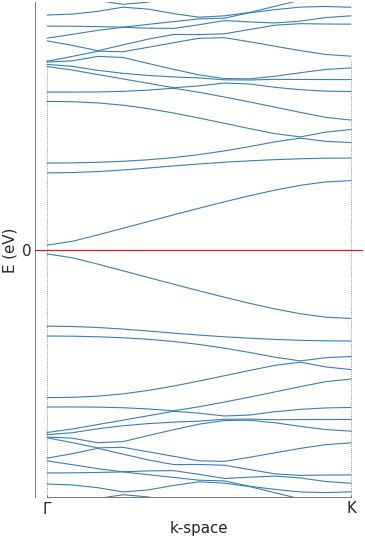

In [44]:
energy(arm_gra_A)

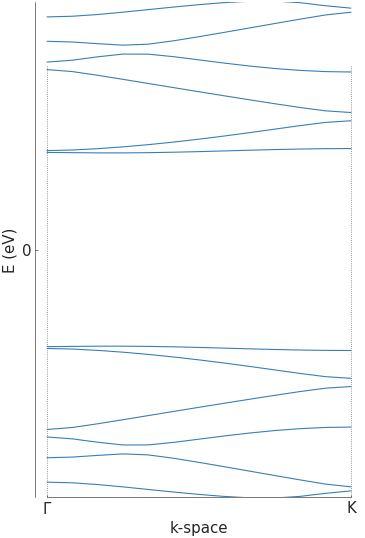

In [108]:
energy(arm_gra_B)

In [133]:
def armchair(w1,w2,w3,w4,e1):
    #w1, w2 is width of each area on the potential changing direction
    #w3 is only for kink, it determines the width of gradual changing area
    #w4 is width of none potential changnig direction
    #e1 is magnitute of the potential
    plt.figure(figsize=(20,20))
        
    plt.subplot(231)
    solver = pb.solver.lapack(arm_gra_A)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [-4*math.pi/a/w4, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1.5,1.5)

    
    
    
    
    
    
    
    
    
#    arm_gra_A shape    
    plt.subplot(234)
    arm_gra_B.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")
    
    plt.subplot(232)
    solver = pb.solver.lapack(arm_gra_B)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [-4*math.pi/a/w4, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1.5,1.5)

    
    
#    arm_gra_B shape    
    plt.subplot(235)
    arm_gra_B.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")  

    
    
    
    
    
    
    plt.subplot(233)
    solver = pb.solver.lapack(arm_gra_A)
    eigenvalues = solver.eigenvalues
    
    
    a_cc = graphene.a_cc
    Gamma = [-4*math.pi/a/w4, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-2,2)

#    arm_gra_A shape    
    plt.subplot(236)
    arm_gra_A.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")

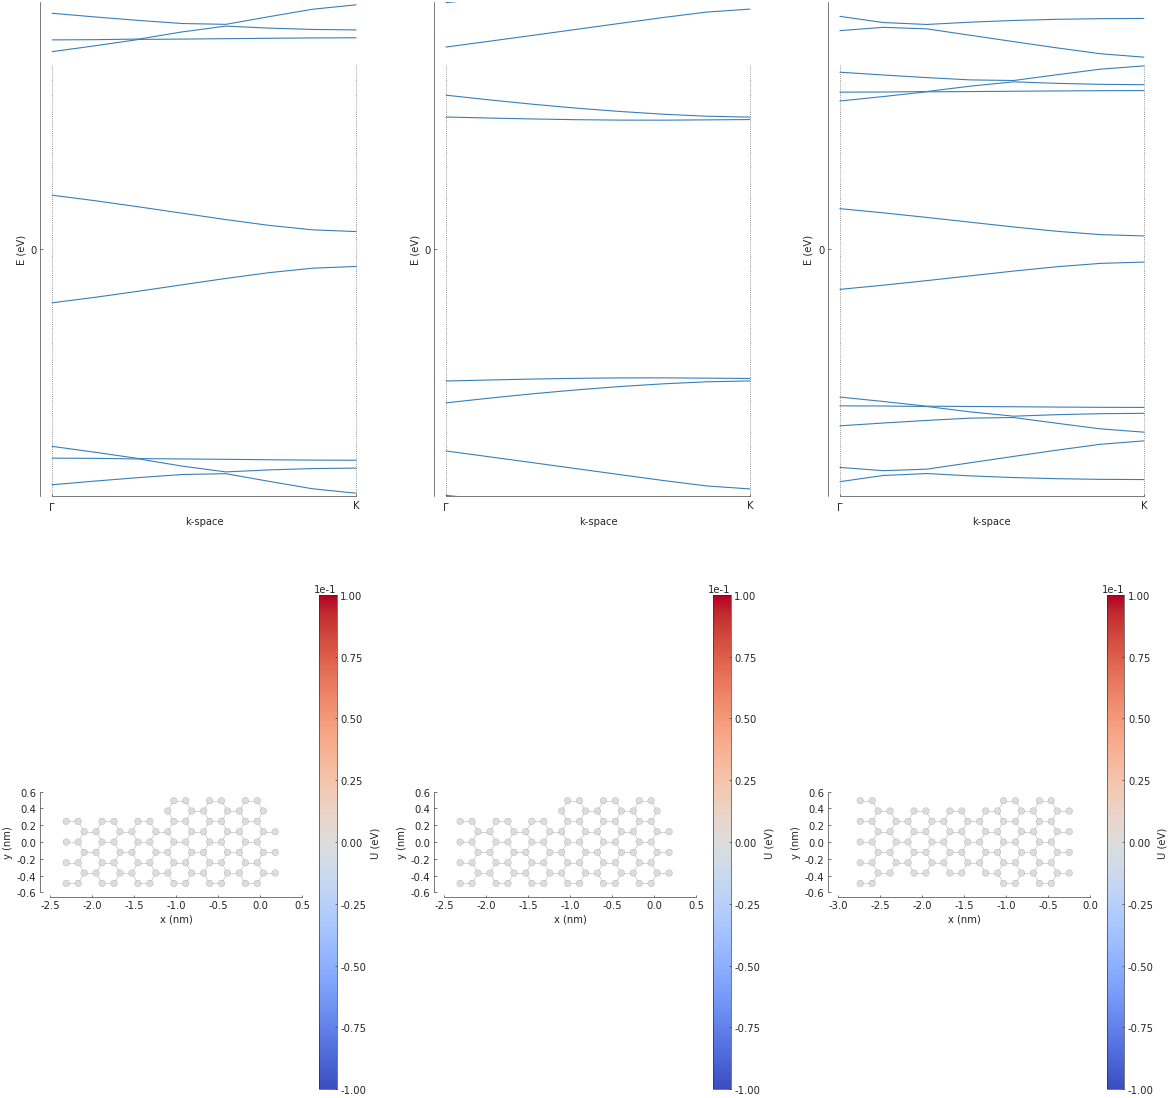

In [134]:
armchair(2,2,0.5,2,1*0.066*math.pi)